<a href="https://colab.research.google.com/github/huzaifakarbalai/DataWrangling_Python/blob/main/Data_Wrangling_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Wrangling Assignment Part 2

## Pipeline:

####1. Missing Values 

####2. Misspelled Values

####3. Outlier

####4. Descriptive and Data Warehousing Analysis

####5. Inferential Analysis

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [ ]:
df = pd.read_csv("/content/sample_data/supermarket_sales_dirty.csv", encoding = 'utf-8')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,NaN,C,Naypyitaw,Member,Male,Sports and travel,42.85,1,2.1425,44.9925,3//2019,15:36,Credit card,42.85,4.761904762,2.1425,9.3
1,696-90-2548,A,Yangon,Normal,Male,Sports and travel,25.84,3,3.8760,81.396,3//2019,18:55,Ewallet,77.52,4.761904762,3.876,6.6
2,NaN,A,Yangon,Member,Female,Fashion accessories,NaN,7,30.9190,649.299,2//2019,13:28,NaN,618.38,4.761904762,30.919,6.6
3,729-06-2010,B,Mandalay,Member,Male,Health and beauty,80.47,9,36.2115,760.4415,1/6/,11:18,Cash,724.23,4.761904762,low,NaN
4,NaN,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.108,1/28/,NaN,Credit card,602.96,4.761904762,30.148,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.1100,779.31,1/1/2019,14:42,Credit card,742.20,4.761904762,37.11,4.3
996,NaN,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.3150,888.615,1/1/2019,NaN,Credit card,846.30,4.761904762,42.315,9.0
997,227-78-1148,B,Mandalay,Normal,Female,Fashion accessories,72.84,7,25.4940,535.374,2/15/2018,12:44,Cash,509.88,4.761904762,25.494,8.4
998,210-67-5886,C,Naypyitaw,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2/5/2018,10:41,Credit card,294.63,4.761904762,14.7315,7.8


In [ ]:
df.shape

(1000, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               905 non-null    object 
 1   Branch                   981 non-null    object 
 2   City                     996 non-null    object 
 3   Customer type            1000 non-null   object 
 4   Gender                   991 non-null    object 
 5   Product line             995 non-null    object 
 6   Unit price               992 non-null    float64
 7   Quantity                 996 non-null    object 
 8   Tax 5%                   1000 non-null   float64
 9   Total                    997 non-null    object 
 10  Date                     1000 non-null   object 
 11  Time                     965 non-null    object 
 12  Payment                  991 non-null    object 
 13  cogs                     989 non-null    float64
 14  gross margin percentage  

It is evident from df.info() that there are some missing values columns. Let's find the total number of missing values by each column

### Missing Value Analysis

In [ ]:
# Columns with missing values:
cols_missing = []
for col in df.columns:
    if df[col].isna().sum()!=0:
        cols_missing.append(col)
        print(col+"\t\t",df[col].isna().sum())

Invoice ID		 95
Branch		 19
City		 4
Gender		 9
Product line		 5
Unit price		 8
Quantity		 4
Total		 3
Time		 35
Payment		 9
cogs		 11
gross margin percentage		 9
Rating		 6


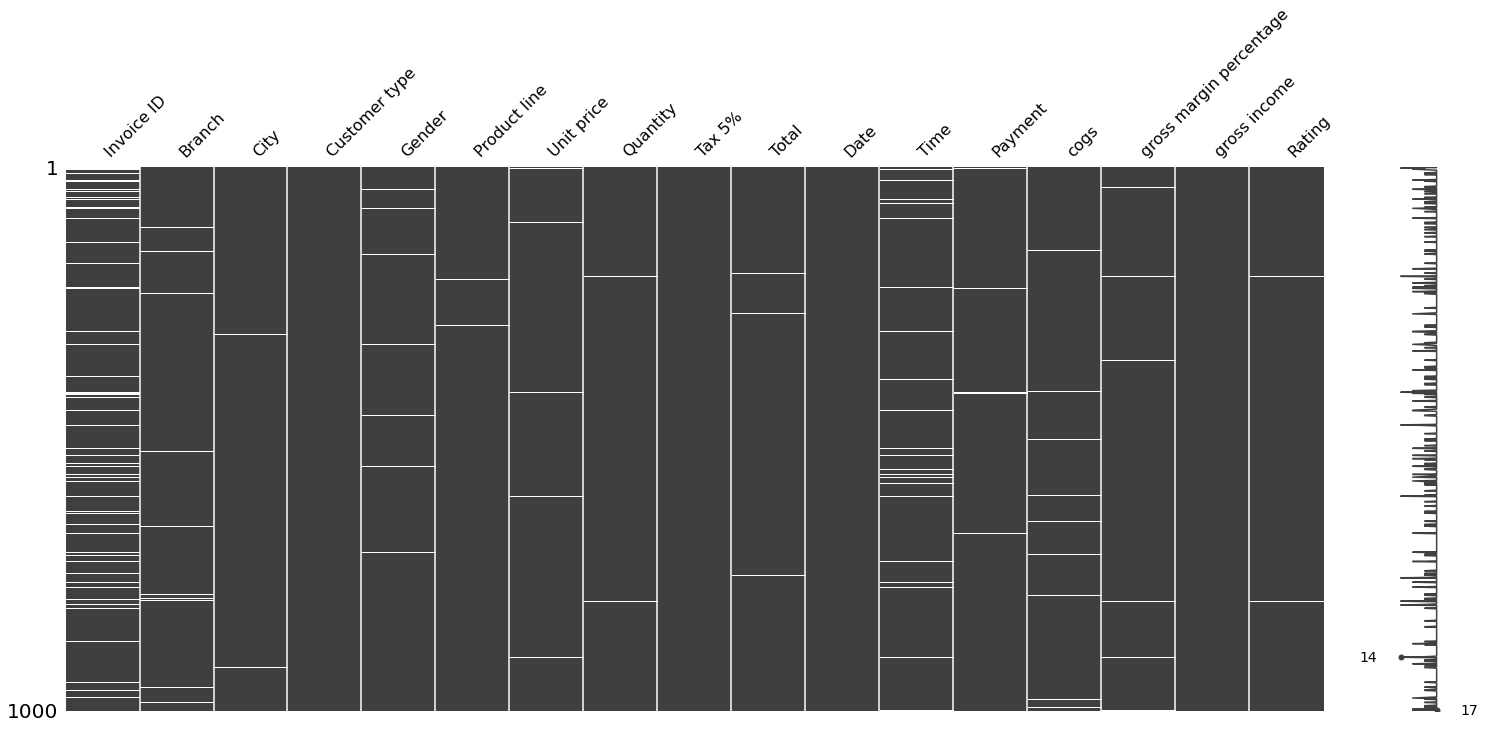

In [ ]:
msno.matrix(df)

We can see that some columns have missing values in the same rows as the adjacent columns meaning there maybe a systematic relationship between the missingness and the observed values, then it is MAR(Missing at Random).  

Let's confirm the type of missing values so we can make better decision about their imputation/deletion

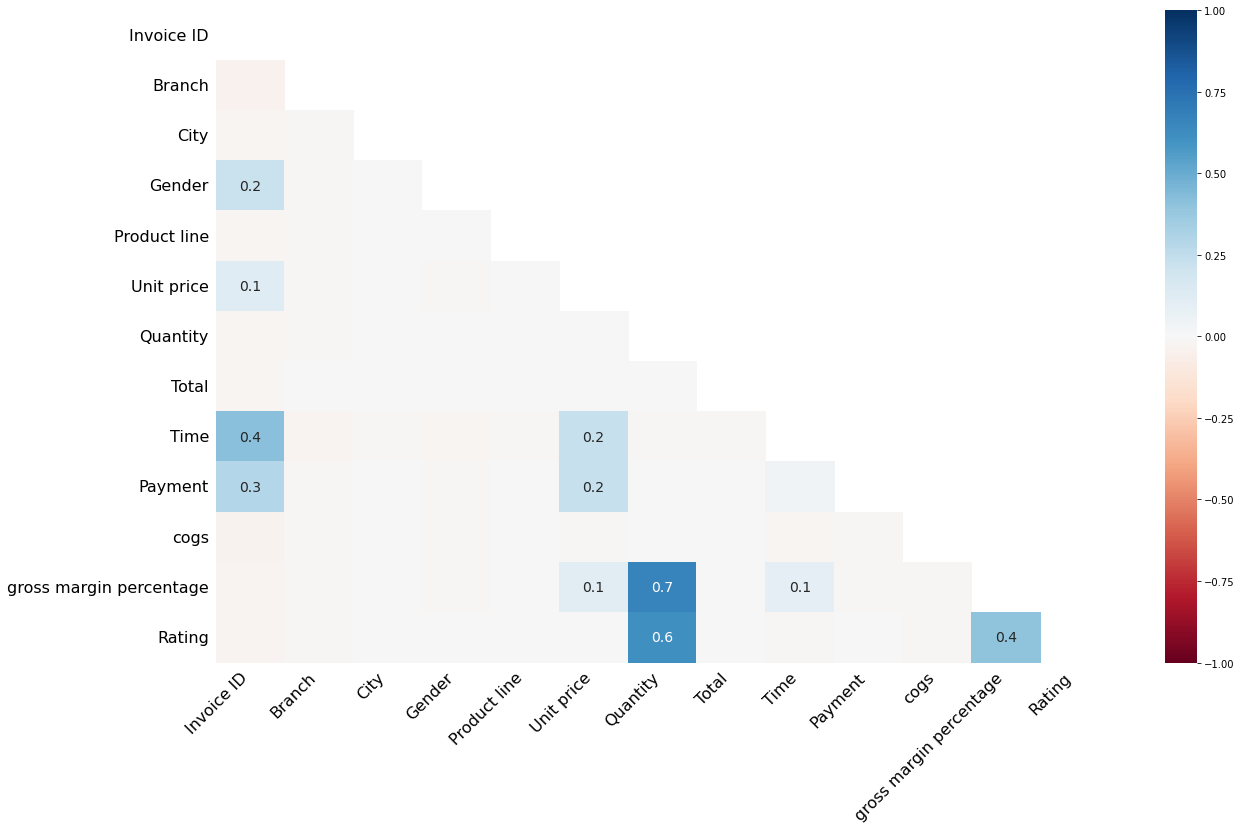

In [ ]:
msno.heatmap(df)

From the above we can see that a missingness in any column is not completely related (or correlated) with missingness of many other columns. As we can see that there seems to be a correlation in gross margin percentage and quantity and rating and quantity. Other than that the correlation is very low. So it maybe a MCAR(Missing completely at Random) case.

In [ ]:
# Since Invoice ID is identifier, therefore we won't need it in the dataset
df = df.drop("Invoice ID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   981 non-null    object 
 1   City                     996 non-null    object 
 2   Customer type            1000 non-null   object 
 3   Gender                   991 non-null    object 
 4   Product line             995 non-null    object 
 5   Unit price               992 non-null    float64
 6   Quantity                 996 non-null    object 
 7   Tax 5%                   1000 non-null   float64
 8   Total                    997 non-null    object 
 9   Date                     1000 non-null   object 
 10  Time                     965 non-null    object 
 11  Payment                  991 non-null    object 
 12  cogs                     989 non-null    float64
 13  gross margin percentage  991 non-null    object 
 14  gross income             

In [ ]:
def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
            num_columns.append(k)

    #print(num_columns)
    return num_columns
    

In [ ]:
numeric_columns = get_num_cols(df)
print(numeric_columns)

['Unit price', 'Tax 5%', 'cogs', 'Rating']


In [ ]:
def get_cat_cols(df):
    types_map = df.dtypes.to_dict()
    cat_columns = []
    for k,v in types_map.items():
        if not( np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v)):
            cat_columns.append(k)

    #print(cat_columns)
    return cat_columns
    

In [ ]:
categorical_columns = get_cat_cols(df)
print(categorical_columns)

['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Quantity', 'Total', 'Date', 'Time', 'Payment', 'gross margin percentage', 'gross income']


It can be seen that some numeric columns like [Quantity,Total, Gross margin Percentage, Gross Income] are labeled as categorical. It could be that these columns contain non-numeric data in some rows.

Let's first rename all column names with spaces to with '_'

In [ ]:
df.columns = [c.replace(' ', '_') for c in df.columns]

Now let's replace all non-numeric values in numeric columns with null value

In [ ]:
df.Quantity = pd.to_numeric(df.Quantity, errors ='coerce')
df.Total = pd.to_numeric(df.Total, errors ='coerce')
df.gross_margin_percentage = pd.to_numeric(df.gross_margin_percentage, errors ='coerce')
df.gross_income = pd.to_numeric(df.gross_income, errors ='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   981 non-null    object 
 1   City                     996 non-null    object 
 2   Customer_type            1000 non-null   object 
 3   Gender                   991 non-null    object 
 4   Product_line             995 non-null    object 
 5   Unit_price               992 non-null    float64
 6   Quantity                 992 non-null    float64
 7   Tax_5%                   1000 non-null   float64
 8   Total                    992 non-null    float64
 9   Date                     1000 non-null   object 
 10  Time                     965 non-null    object 
 11  Payment                  991 non-null    object 
 12  cogs                     989 non-null    float64
 13  gross_margin_percentage  989 non-null    float64
 14  gross_income             

Now let's derive the missing values of quantity, total and unit price

In [ ]:
# Quantity = (Total - Tax)/Unit price
#These are the indexes where Quantity has null values
quantity = df[df['Quantity'].isnull()].index.tolist()
quantity
for i in quantity:
    df.loc[i,'Quantity'] = ((df.loc[i,'Total']-df.loc[i,'Tax_5%'])/df.loc[i,'Unit_price'])

In [ ]:
# Total = Unit price * Quantity + Tax
#These are the indexes where Total has null values
total = df[df['Total'].isnull()].index.tolist()
total
for i in total:
    df.loc[i,'Total'] = df.loc[i,'Unit_price']*df.loc[i,'Quantity'] + df.loc[i,'Tax_5%']

In [ ]:
# Unit price = (Total - Tax)/Quantity
#These are the indexes where Total has null values
up = df[df['Unit_price'].isnull()].index.tolist()
up
for i in up:
    df.loc[i,'Unit_price'] = ((df.loc[i,'Total']-df.loc[i,'Tax_5%'])/df.loc[i,'Quantity'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   981 non-null    object 
 1   City                     996 non-null    object 
 2   Customer_type            1000 non-null   object 
 3   Gender                   991 non-null    object 
 4   Product_line             995 non-null    object 
 5   Unit_price               1000 non-null   float64
 6   Quantity                 1000 non-null   float64
 7   Tax_5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     965 non-null    object 
 11  Payment                  991 non-null    object 
 12  cogs                     989 non-null    float64
 13  gross_margin_percentage  989 non-null    float64
 14  gross_income             

By analyzing the data from excel it turns out that the gross margin percentage is standard 4.761904762 for all the values so we can stil derive that.

In [ ]:
#gross margin percentage = (Total-COGS) * (100/Total) 
#These are the indexes where gross margin percentage has null values
gmp = df[df['gross_margin_percentage'].isnull()].index.tolist()
up
for i in gmp:
    df.loc[i,'gross_margin_percentage'] = (df.loc[i,'Total']-df.loc[i,'cogs'])*(100/df.loc[i,'Total'])

Now let's replace cogs and gross income and rating null values

In [ ]:
#COGS = Total-(gross margin percentage/100)*Total 
#These are the indexes where gross margin percentage has null values
cogs = df[df['cogs'].isnull()].index.tolist()
cogs
for i in cogs:
    df.loc[i,'cogs'] = df.loc[i,'Total']-(df.loc[i,'gross_margin_percentage']/100)*df.loc[i,'Total']

In [ ]:
#gross income = Total - cogs
#These are the indexes where gross margin percentage has null values
gi = df[df['gross_income'].isnull()].index.tolist()
gi 
for i in gi:
    df.loc[i,'gross_income'] = df.loc[i,'Total']-df.loc[i,'cogs']

In [ ]:
#Replace rating null values with mean
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   981 non-null    object 
 1   City                     996 non-null    object 
 2   Customer_type            1000 non-null   object 
 3   Gender                   991 non-null    object 
 4   Product_line             995 non-null    object 
 5   Unit_price               1000 non-null   float64
 6   Quantity                 1000 non-null   float64
 7   Tax_5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     965 non-null    object 
 11  Payment                  991 non-null    object 
 12  cogs                     1000 non-null   float64
 13  gross_margin_percentage  1000 non-null   float64
 14  gross_income             

Now let's replace categorical missing values City, Gender and Product Line

In [ ]:
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Product_line'] = df['Product_line'].fillna(df['Product_line'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   981 non-null    object 
 1   City                     1000 non-null   object 
 2   Customer_type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product_line             1000 non-null   object 
 5   Unit_price               1000 non-null   float64
 6   Quantity                 1000 non-null   float64
 7   Tax_5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     965 non-null    object 
 11  Payment                  991 non-null    object 
 12  cogs                     1000 non-null   float64
 13  gross_margin_percentage  1000 non-null   float64
 14  gross_income             

Now we will replace Branch, but it has a pattern: 

Branch A = City Yangon
Branch B = City Mandalay
Branch C = City Naypyitaw

In [ ]:
#These are the indexes where Branch has null values
br = df[df['Branch'].isnull()].index.tolist()
br
for i in br:
    if df.loc[i,'City'] == 'Yangon':
      df.loc[i,'Branch'] = 'A'
    elif df.loc[i,'City'] == 'Mandalay':
      df.loc[i,'Branch'] = 'B'
    elif df.loc[i,'City'] == 'Naypyitaw':
      df.loc[i,'Branch'] = 'C'

Payment column has invalid numeric values also which needs to be replaced with null values

In [ ]:
pmethod = ['Cash','Credit card','Ewallet']
pi = df['Payment'].index.tolist()

for i in pi:
  if df.loc[i,'Payment'] not in pmethod:
    df.loc[i,'Payment'] = np.nan

In [ ]:
#Replace all null values in Payment column with mode
df['Payment'] = df['Payment'].fillna(df['Payment'].mode()[0])

Let's replace the time null values finally by forward fill

In [ ]:
df['Time'] = df['Time'].ffill()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer_type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product_line             1000 non-null   object 
 5   Unit_price               1000 non-null   float64
 6   Quantity                 1000 non-null   float64
 7   Tax_5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross_margin_percentage  1000 non-null   float64
 14  gross_income             

Finally, our whole data set is dealt with missing values

###Misspelled Values

By evaluating data from excel it is evident that the columns [City, Product Line] Have some misspelled values. Let's fix that.

In [ ]:
#Find the unique values in the city and Product Line so we can see the misspelled values.
df['City'].unique()

array(['Naypyitaw', 'Yangon', 'Mandalay', 'Yangono', 'Yangon0',
       'Naypyitawp', 'Naypyitawe', 'Naypyitay'], dtype=object)

In [ ]:
df['Product_line'].unique()

array(['Sports and travel', 'Fashion accessories', 'Health and beauty',
       'Food and beverages', 'Home and lifestyle',
       'Electronic accessories', 'Electronic accessories+F327',
       'Home and lifest', 'Health and bea', 'Sports and tr',
       'Fashion access', 'Electr', 'Electronic access', 'Electronic a',
       'Sports and tra', 'Food and bever'], dtype=object)

In [ ]:
#Let's create a list of misspelled values in City
# Correct spelling is Naypyidaw and Yangon
naypyidaw = ['Naypyitaw','Naypyitawp','Naypyitay','Naypyitawe']
yangon = ['Yangon0','Yangono']

c = 0
for i in df['City'].tolist():
  if i in naypyidaw:
    df.loc[c,'City'] =  'Naypyidaw'
  elif i in yangon:
    df.loc[c,'City'] =  'Yangon'
  c+=1

Let's ensure that all misspelled values were replaced or not

In [ ]:
for i in naypyidaw:
  if i in df['City']:
    print(True)
  else:
    print(False)
for i in yangon:
  if i in df['City']:
    print(True)
  else:
    print(False)

False
False
False
False
False
False


This tells us that the method was successful now let's do same for Product Line column

In [ ]:
#Let's create a list of misspelled values in Product Line
# Correct spelling is Electronic accessories, Home and lifestyle, Sports and travel, Health and beauty, Food and beverages, Fashion accessories
electronic = ['Electronic access','Electronic accessories+F327','Electr','Electronic a']
home  = ['Home and lifest']
sport = ['Sports and tra','Sports and tr']
health = ['Health and bea']
food = ['Food and bever']
fashion = ['Fashion access']

p = 0
for i in df['Product_line'].tolist():
  if i in electronic:
    df.loc[p,'Product_line'] = 'Electronic accessories'
  elif i in home:
    df.loc[p,'Product_line'] = 'Home and lifestyle'
  elif i in sport:
    df.loc[p,'Product_line'] = 'Sports and travel'
  elif i in health:
    df.loc[p,'Product_line'] = 'Health and beauty'
  elif i in food:
    df.loc[p,'Product_line'] = 'Food and beverages'
  elif i in fashion:
    df.loc[p,'Product_line'] = 'Fashion accessories'
  p+=1

Now all misspelled values are alse corrected



In [ ]:
# from google.colab import files

# df.to_csv('output.csv', encoding = 'utf-8-sig') 
# files.download('output.csv')

### Outliers




We will do some outlier analysis here

In [ ]:
numeric_columns = get_num_cols(df)
print("Numeric Columns",numeric_columns)
categorical_columns = get_cat_cols(df)
print("Categorical Columns",categorical_columns)
categorical_columns.remove('Date')
categorical_columns.remove('Time')

Numeric Columns ['Unit_price', 'Quantity', 'Tax_5%', 'Total', 'cogs', 'gross_margin_percentage', 'gross_income', 'Rating']
Categorical Columns ['Branch', 'City', 'Customer_type', 'Gender', 'Product_line', 'Date', 'Time', 'Payment']


In [ ]:
# Box Plot
def box_plots(num_cols, df):
    for i in range(len(num_cols)-1):
        plt.figure(figsize=(10, 5), dpi = 100)
        sns.boxplot(x = df[num_cols[i]])

# Distribution plots
def dis_plots(num_cols, df): 
    for i in range(len(num_cols)-1):
        plt.figure(figsize=(10, 5), dpi = 100)
        sns.displot(x = df[num_cols[i]])

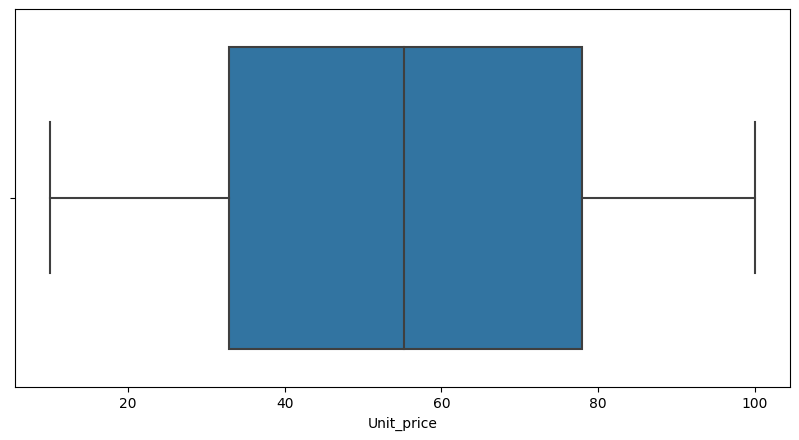

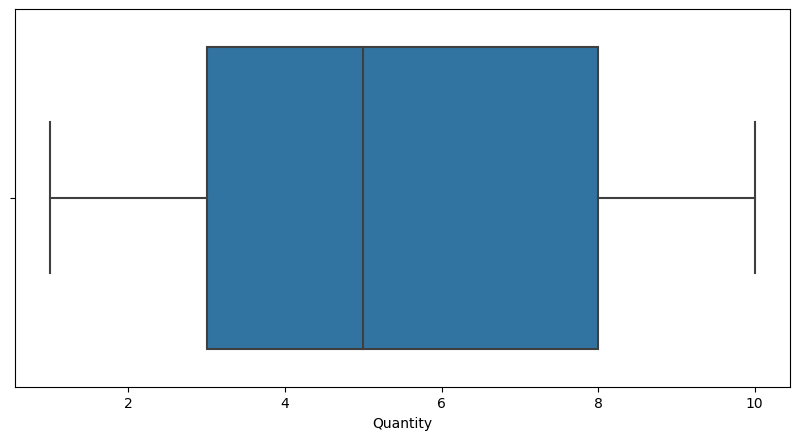

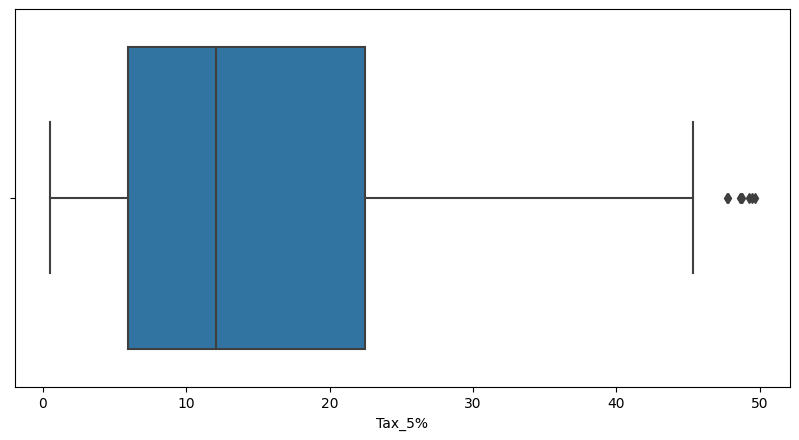

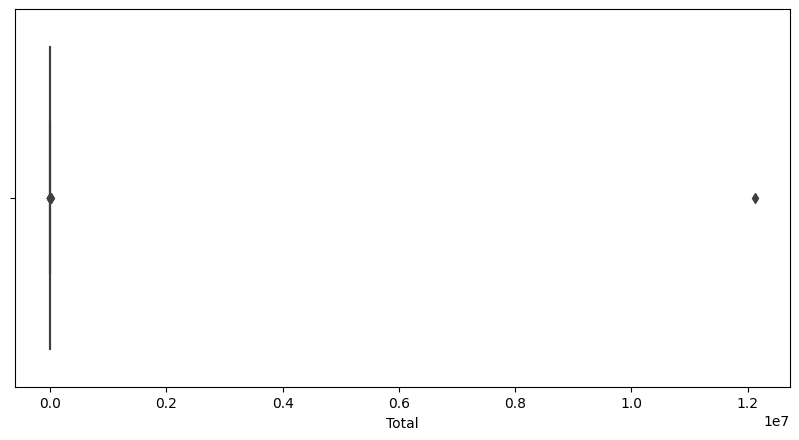

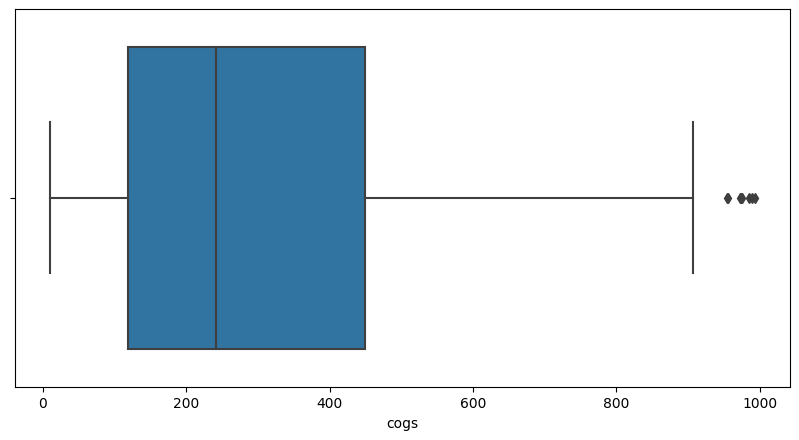

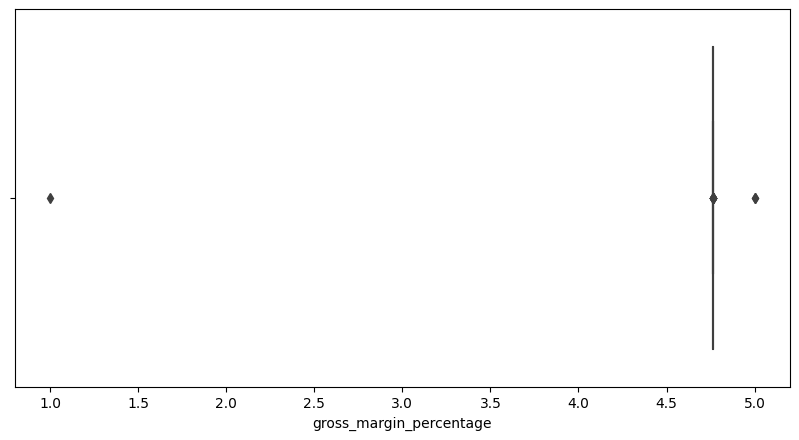

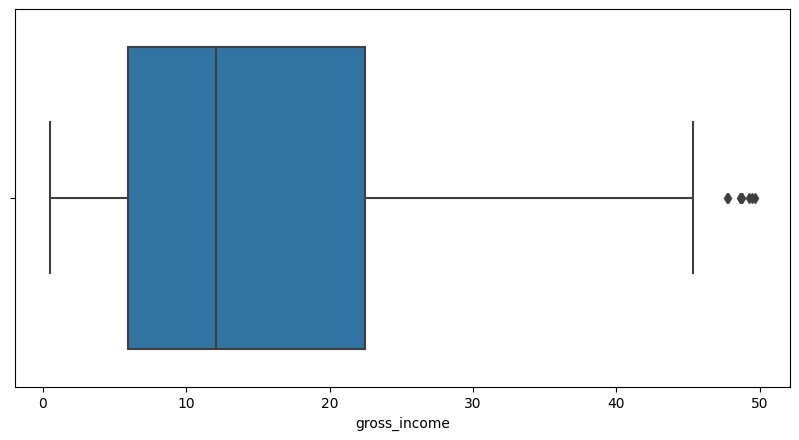

In [ ]:
box_plots(numeric_columns, df)

From the box plots above we can see that Unit price and quantity have a symmetrical distribution, while Tax, Cogs and Gross income have rightly skewed distribution. Also Total column have an abnormal distribution

In [ ]:
print("Mean: {}".format(df["Total"].mean()))
print("Median: {}".format(df["Total"].median()))
print("Min: {}".format(df["Total"].min()))
print("Max: {}".format(df["Total"].max()))

Mean: 12456.498908500007
Median: 255.16575
Min: 10.6785
Max: 12121555.0


Due to some very large values the data has skewed and the mean has shifted so the box plot is spreaded. Let's fix it

In [ ]:
df["Total"][df["Total"]> 10000]

210    12121555.0
784       12234.0
Name: Total, dtype: float64

In [ ]:
df.iloc[210]

Branch                                      B
City                                 Mandalay
Customer_type                          Normal
Gender                                 Female
Product_line               Home and lifestyle
Unit_price                               40.3
Quantity                                  2.0
Tax_5%                                   4.03
Total                              12121555.0
Date                                3/11/2019
Time                                    15:30
Payment                               Ewallet
cogs                                     80.6
gross_margin_percentage              4.761905
gross_income                             4.03
Rating                                    4.4
Name: 210, dtype: object

In [ ]:
df.iloc[784]

Branch                                      A
City                                   Yangon
Customer_type                          Normal
Gender                                   Male
Product_line               Food and beverages
Unit_price                              54.67
Quantity                                  3.0
Tax_5%                                 8.2005
Total                                 12234.0
Date                                1/21/2019
Time                                    18:00
Payment                           Credit card
cogs                                   164.01
gross_margin_percentage              4.761905
gross_income                           8.2005
Rating                                    8.6
Name: 784, dtype: object

It is evident that total column is miscalculated

In [ ]:
df.loc[210,'Total'] = (df.loc[18,'Unit_price']*df.loc[18,'Quantity']+df.loc[18,'Tax_5%'])
df.loc[784,'Total'] = (df.loc[19,'Unit_price']*df.loc[19,'Quantity']+df.loc[19,'Tax_5%'])

In [ ]:
df.iloc[210]

Branch                                      B
City                                 Mandalay
Customer_type                          Normal
Gender                                 Female
Product_line               Home and lifestyle
Unit_price                               40.3
Quantity                                  2.0
Tax_5%                                   4.03
Total                                 121.128
Date                                3/11/2019
Time                                    15:30
Payment                               Ewallet
cogs                                     80.6
gross_margin_percentage              4.761905
gross_income                             4.03
Rating                                    4.4
Name: 210, dtype: object

In [ ]:
df.iloc[784]

Branch                                      A
City                                   Yangon
Customer_type                          Normal
Gender                                   Male
Product_line               Food and beverages
Unit_price                              54.67
Quantity                                  3.0
Tax_5%                                 8.2005
Total                                 228.123
Date                                1/21/2019
Time                                    18:00
Payment                           Credit card
cogs                                   164.01
gross_margin_percentage              4.761905
gross_income                           8.2005
Rating                                    8.6
Name: 784, dtype: object

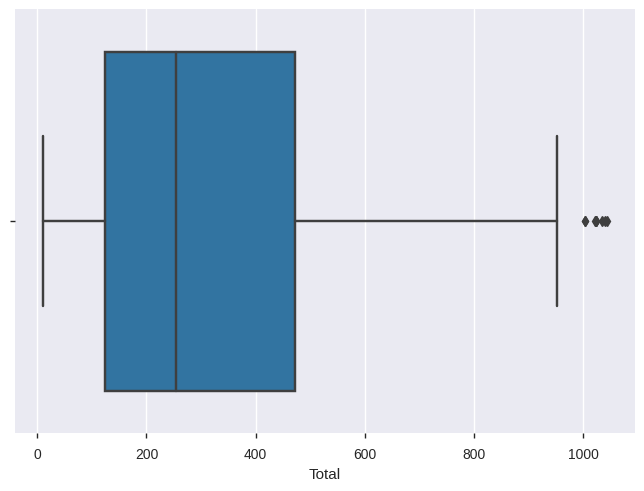

In [ ]:
sns.boxplot(x = df['Total'])

**The total distribution is corrected now**

For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.
The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

In [ ]:
percentile25 = df['cogs'].quantile(0.25)
percentile75 = df['cogs'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df = df[df['cogs'] < upper_limit]

Box plot after removing outliers from the cogs

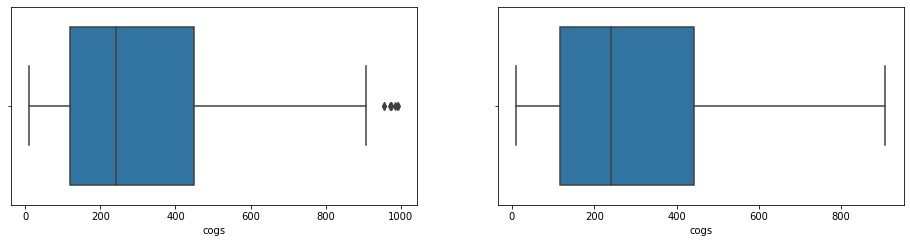

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(x = df['cogs'])
plt.subplot(2,2,2)
sns.boxplot(x = new_df['cogs'])

**Summary of Numerical Data**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit_price,1000.0,55.672130,26.494628,10.0800,32.875000,55.230000,77.935000,99.96
Quantity,1000.0,5.510000,2.923431,1.0000,3.000000,5.000000,8.000000,10.00
Tax_5%,1000.0,15.379369,11.708825,0.5085,5.924875,12.088000,22.445250,49.65
Total,1000.0,323.059160,245.824657,10.6785,124.422375,253.848000,471.350250,1042.65
cogs,1000.0,307.587380,234.176510,10.1700,118.497500,241.760000,448.905000,993.00
gross_margin_percentage,1000.0,4.758619,0.119452,1.0000,4.761905,4.761905,4.761905,5.00
gross_income,1000.0,15.379369,11.708825,0.5085,5.924875,12.088000,22.445250,49.65
Rating,1000.0,6.968612,1.711014,4.0000,5.500000,6.968612,8.400000,10.00


### Descriptive Data Warehousing analysis of Categorical Data

In [ ]:
def bar_charts(num_cols, cat_cols, df):
    for i in range((len(numeric_columns)-1)):    
        for j in range((len(categorical_columns)-1)): 
            pvt = df.pivot_table(columns=[categorical_columns[j]], values=numeric_columns[i], aggfunc='mean').round(2)
            pvt.plot.bar()
            

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


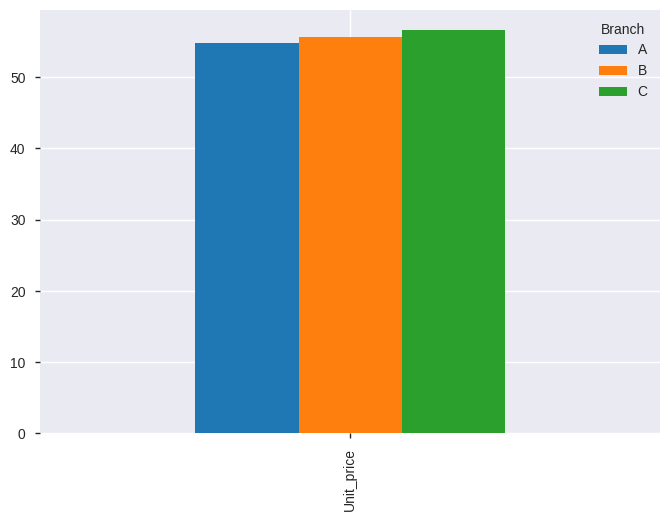

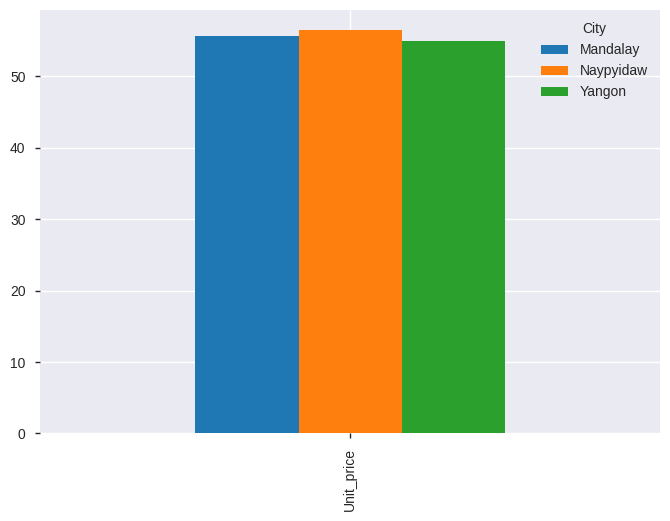

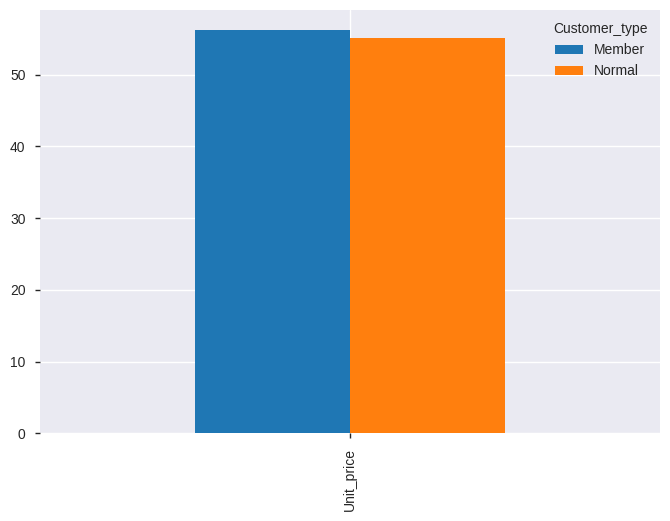

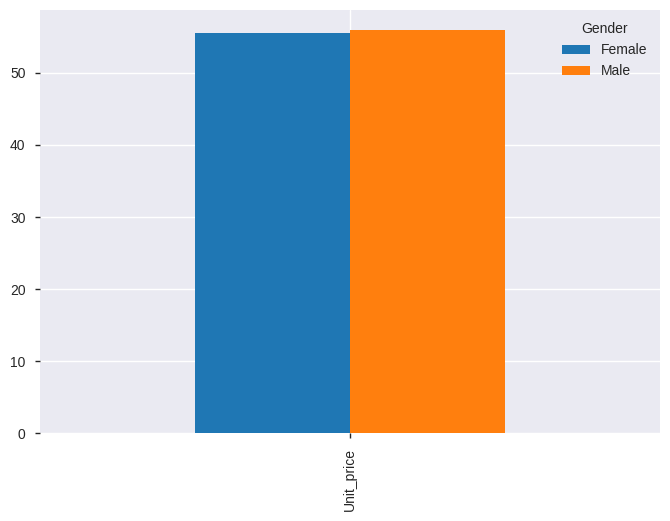

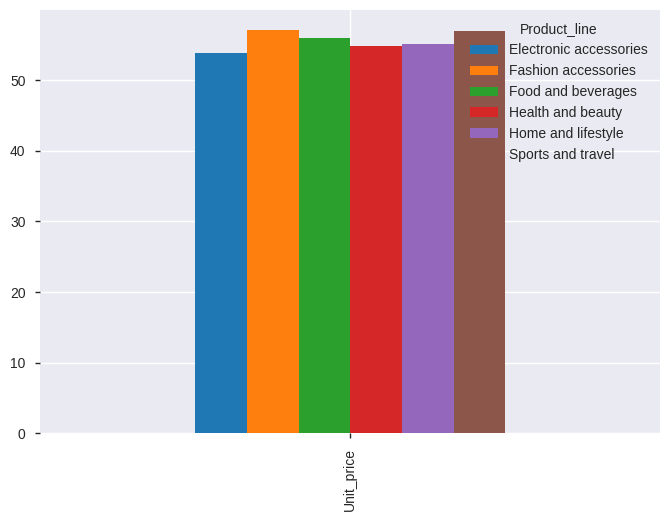

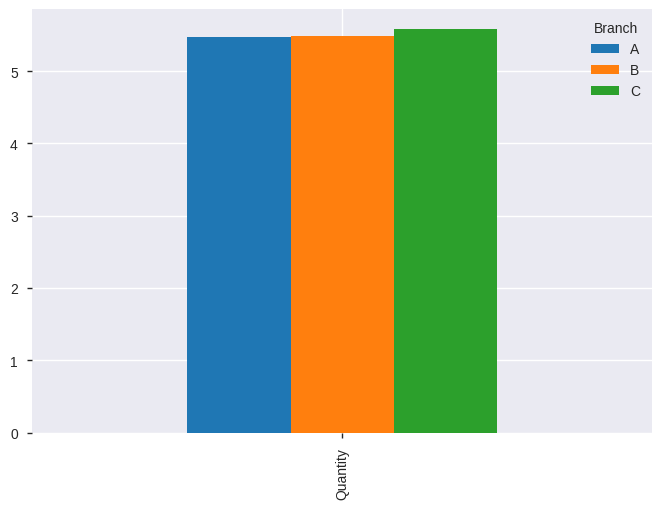

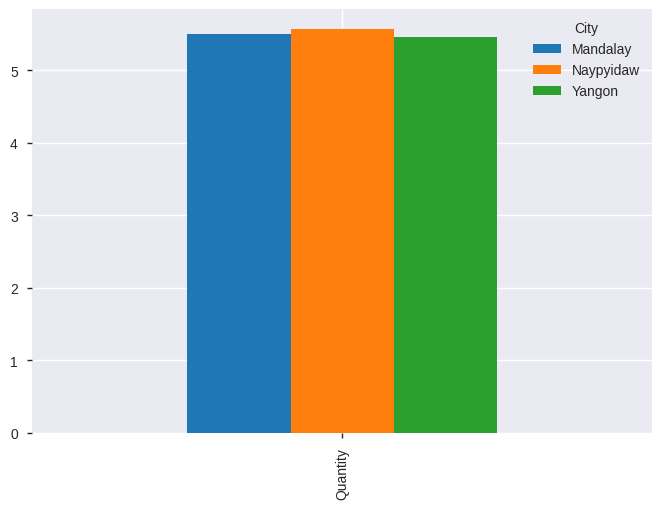

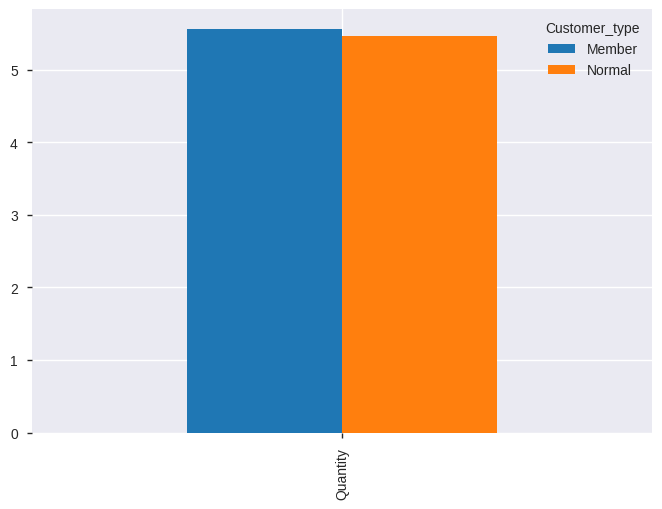

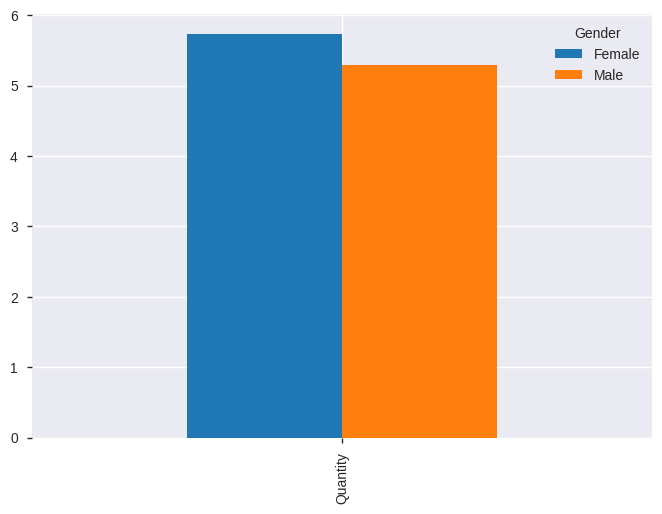

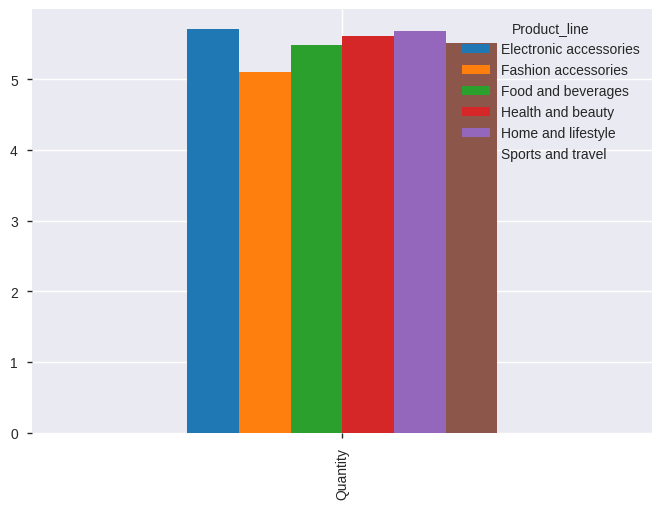

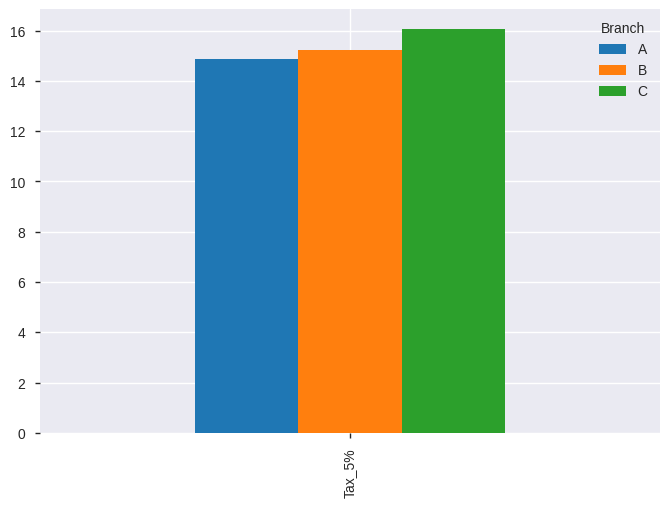

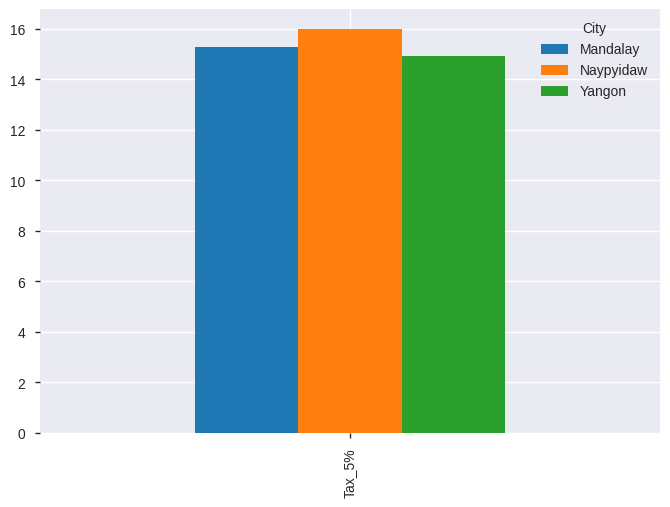

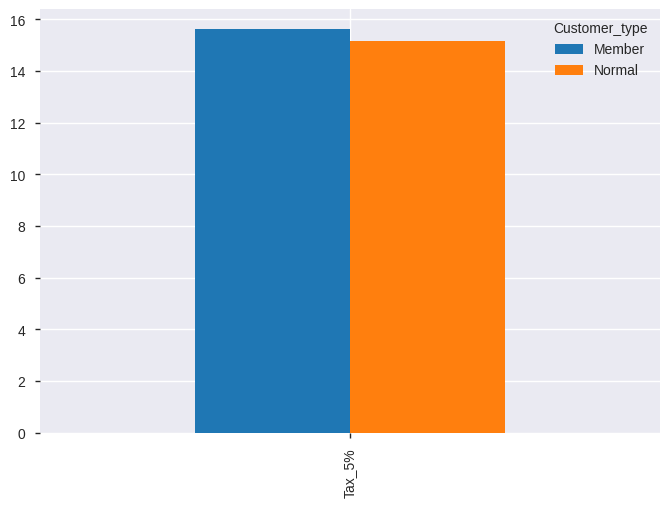

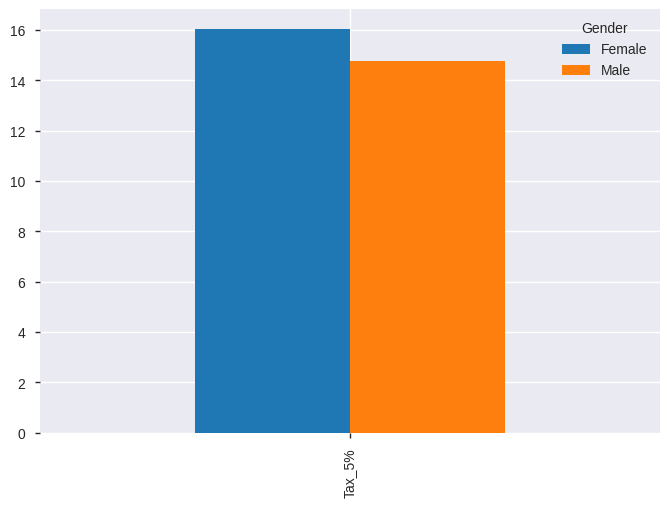

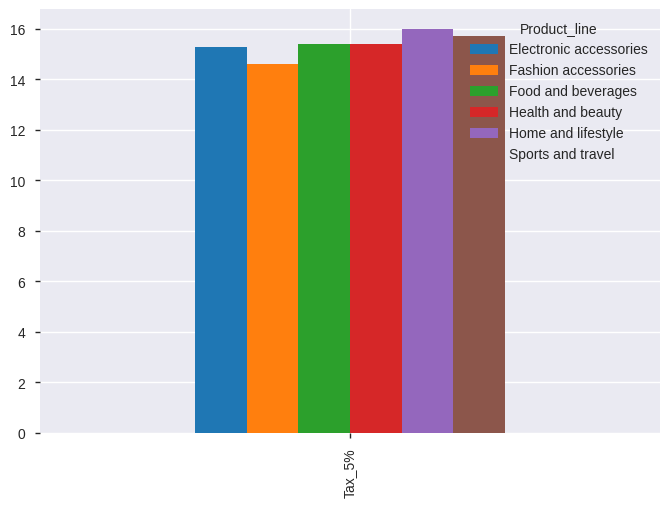

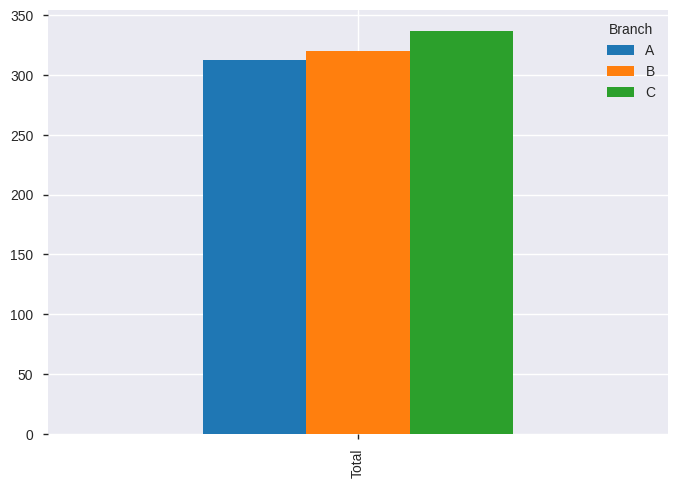

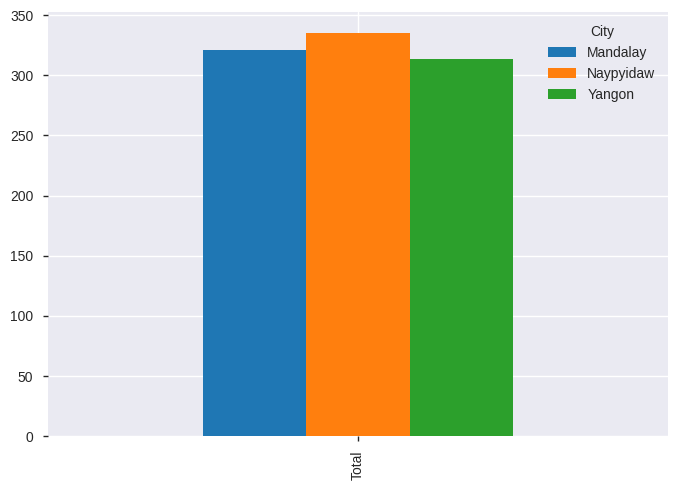

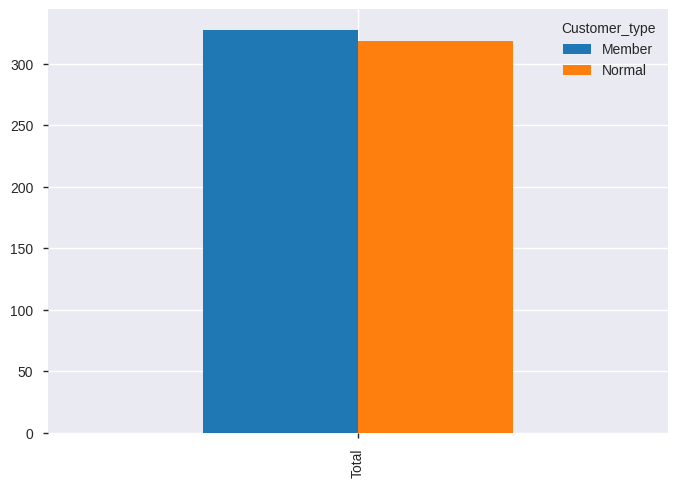

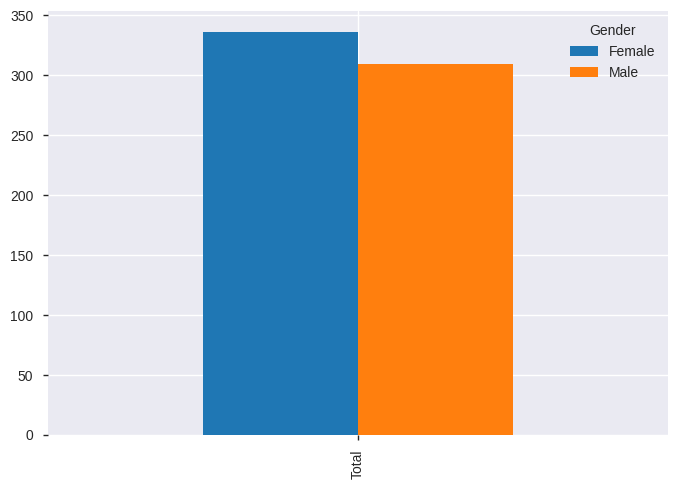

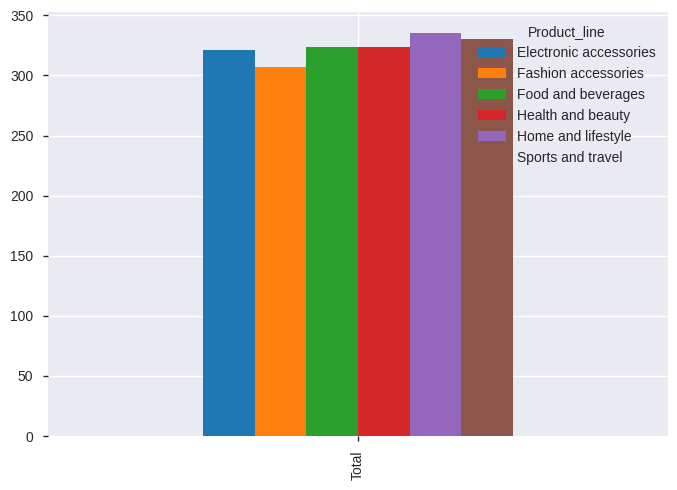

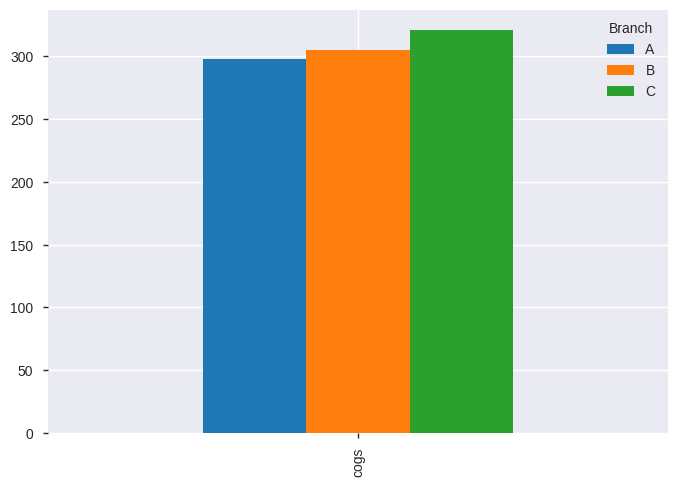

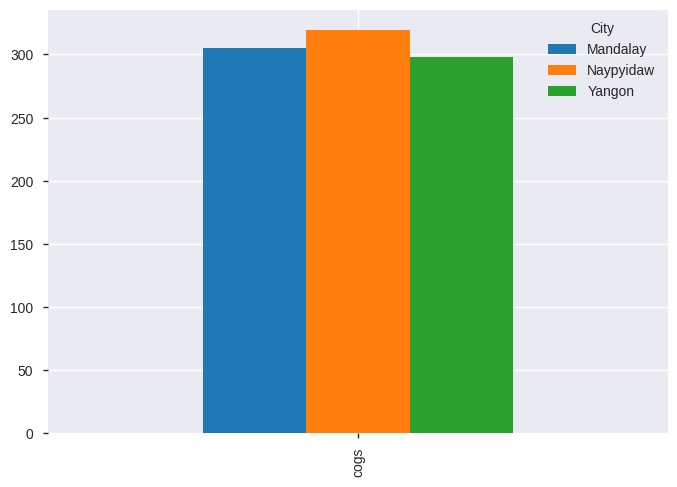

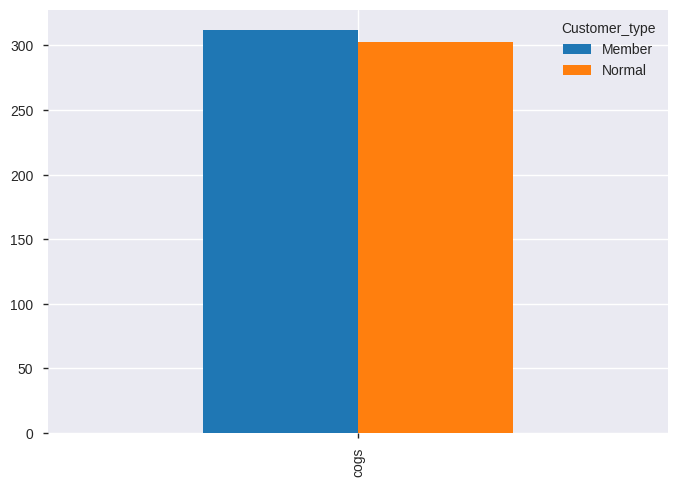

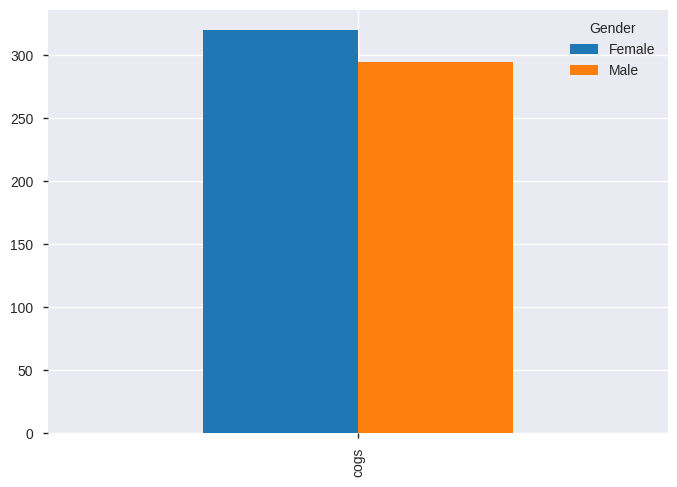

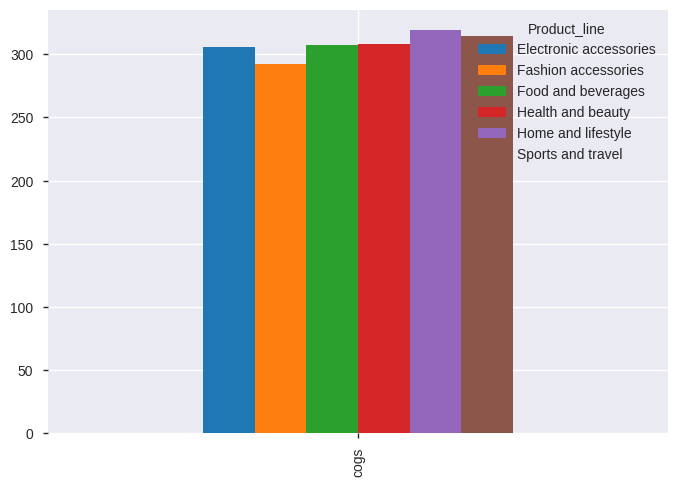

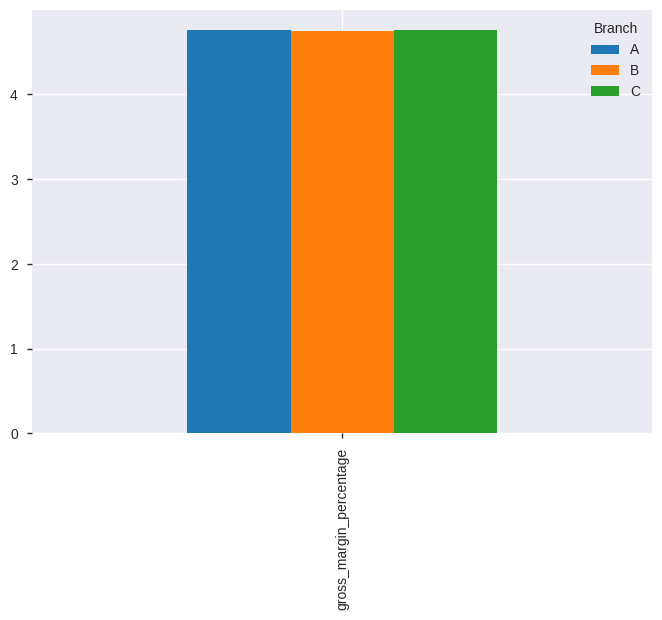

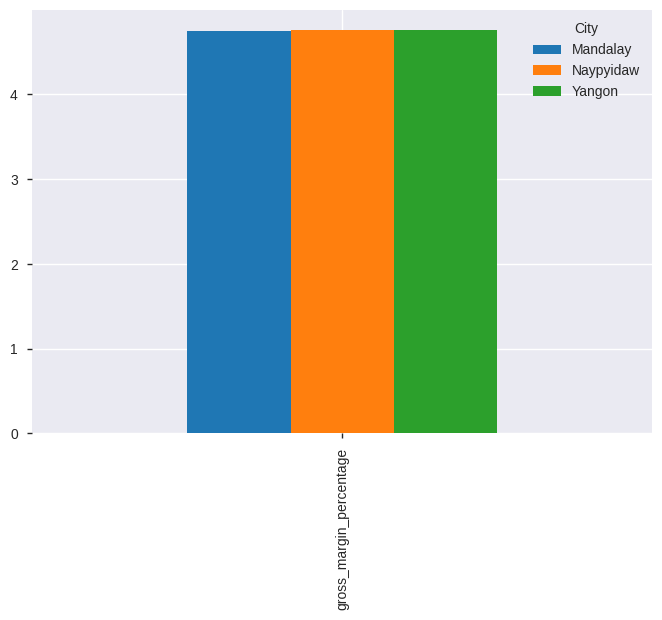

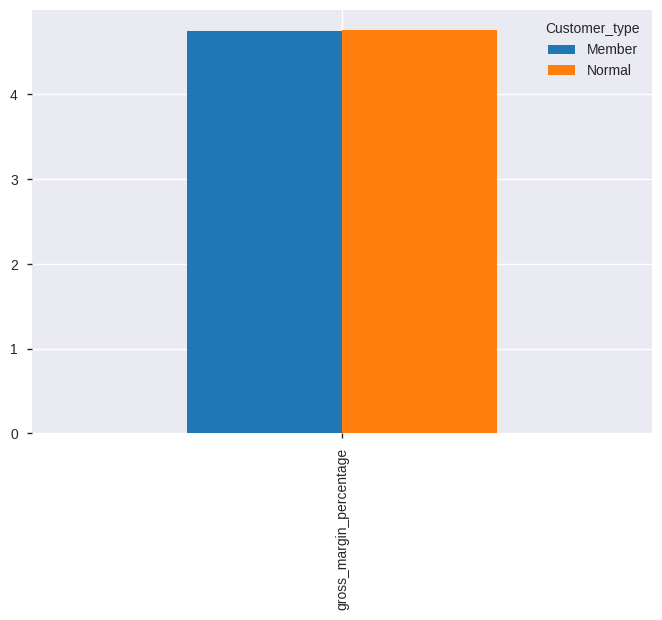

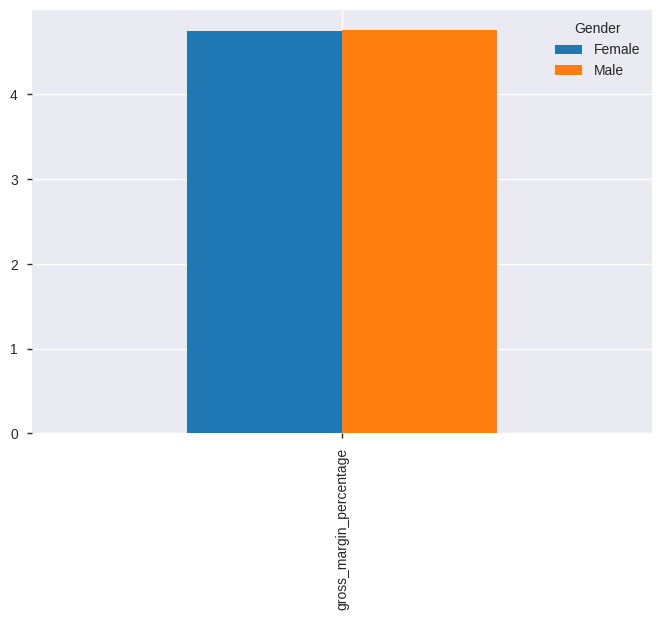

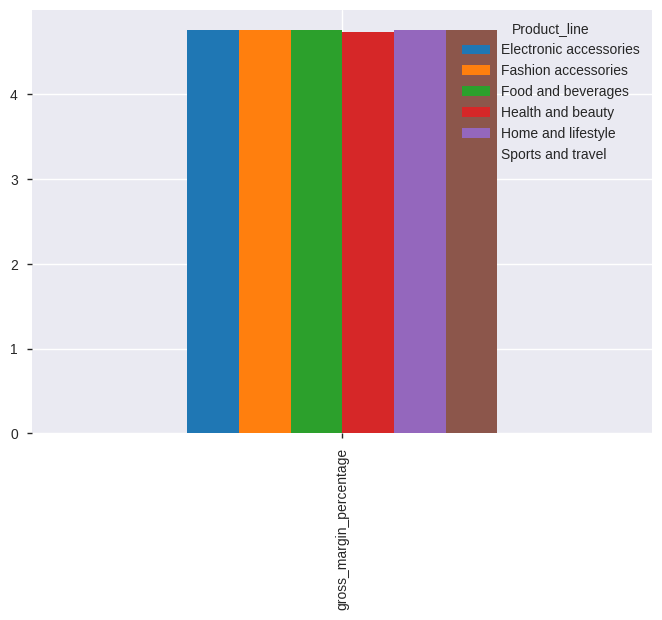

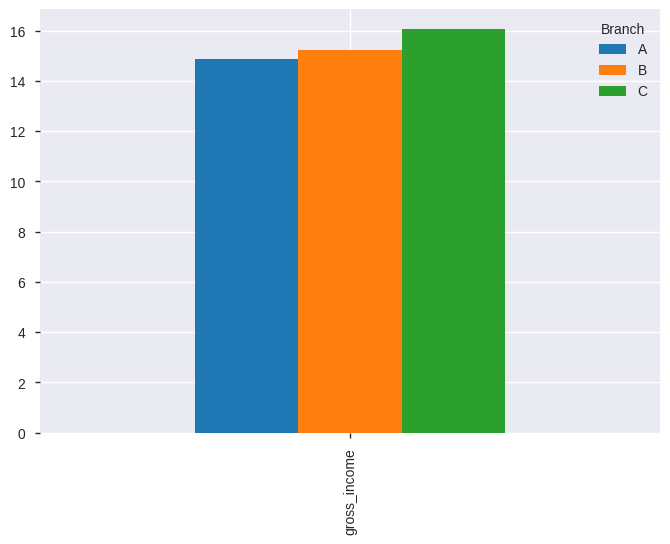

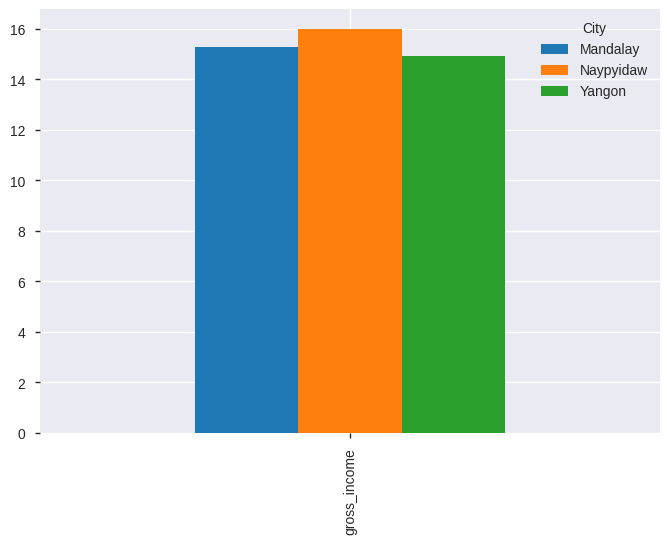

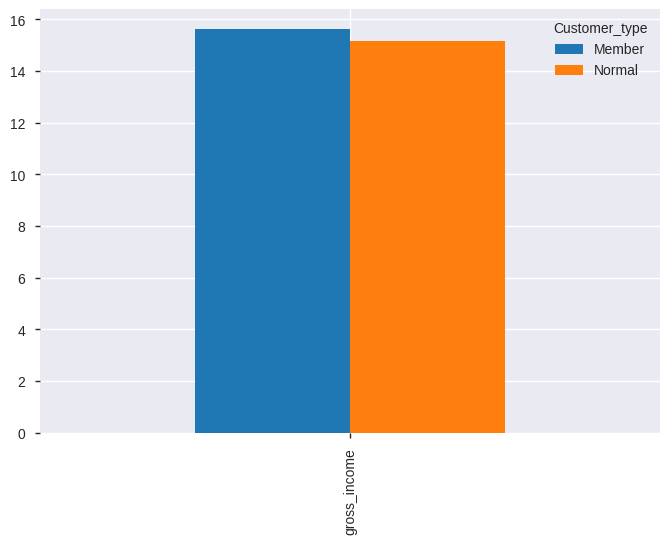

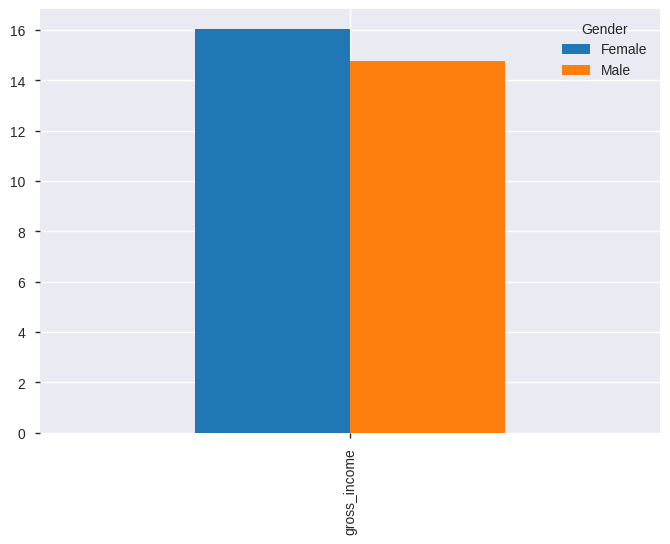

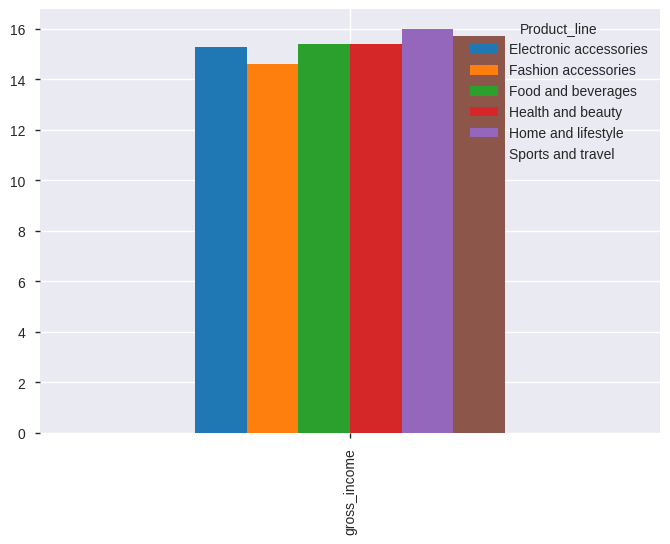

In [ ]:
bar_charts(numeric_columns, categorical_columns, df)

##Inferential Analysis

### T-Test
Between 2 Numerical columns, to determine whether two variables are dependent on eachother or not

In [ ]:
# T-Test

def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
            num_columns.append(k)

    #print(num_columns)
    return num_columns

def t_test(df):
    num_columns = get_num_cols(df)
    for i in range(3): #(len(num_columns)-1):
        print("\n --------"+num_columns[i]+"--------")
        for j in range(i+1, 5): #(i+1,len(num_columns)):
            col1 = num_columns[i]
            col2 = num_columns[j]
            t_val, p_val = stats.ttest_ind(df[col1], df[col2])
            if(p_val<0.05):
                print("Dependent (reject H0) \t(%s,%s) => t-value=%s, p-value=%s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))
            # interpret p-value
#             alpha = 0.05
#             #print('significance=%.3f, p=%.3f' % (alpha, p_val))
#             if p_val <= alpha:
#                 print('Dependent (reject H0)')
            else:
                   print('Independent (fail to reject H0)',num_columns[i], num_columns[j])


In [ ]:
t_test(df)
##Displaying only those results where t-test result is significant i.e., variables are dependant and H0 rejected


 --------Unit_price--------
Dependent (reject H0) 	(Unit_price,Quantity) => t-value=59.510051852604406, p-value=0.0
Dependent (reject H0) 	(Unit_price,Tax_5%) => t-value=43.98757502882582, p-value=3.8136673806304974e-296
Independent (fail to reject H0) Unit_price Total
Dependent (reject H0) 	(Unit_price,cogs) => t-value=-33.802526630988865, p-value=1.7723471193476954e-198

 --------Quantity--------
Dependent (reject H0) 	(Quantity,Tax_5%) => t-value=-25.860952601110867, p-value=1.9210323645434736e-127
Independent (fail to reject H0) Quantity Total
Dependent (reject H0) 	(Quantity,cogs) => t-value=-40.788810285145225, p-value=3.9376424844612484e-265

 --------Tax_5%--------
Independent (fail to reject H0) Tax_5% Total
Dependent (reject H0) 	(Tax_5%,cogs) => t-value=-39.41001488351547, p-value=8.076365423467091e-252


### Chi-Square Test
Between 2 categorical variables

Example: Between Gender(Male/Female) & Employment Status(Emp/Unemp)


In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(cat_cols, df):
    for i in range(3):  #(len(cat_cols)-1):
        print("\n\t --------"+cat_cols[i]+"--------")
        for j in range(i+1,4): #len(cat_cols)):
            cat_var1 = cat_cols[i]
            cat_var2 = cat_cols[j]
            data_crosstab = pd.crosstab(df[cat_var1], df[cat_var2], margins = False) 
            print(data_crosstab) 

            stat, p, dof, expected = chi2_contingency(data_crosstab)
            print('dof=%d' % dof)
            print(expected)

    # interpret p-value
            alpha = 0.05
            print('significance=%.3f, p=%.3f' % (alpha, p))
            if p <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')
            print("\n")

In [ ]:
chi_square_test(categorical_columns,df)


	 --------Branch--------
City    Mandalay  Naypyidaw  Yangon
Branch                             
A              0          0     340
B            329          0       3
C              0        327       1
dof=4
[[111.86  111.18  116.96 ]
 [109.228 108.564 114.208]
 [107.912 107.256 112.832]]
significance=0.050, p=0.000
Dependent (reject H0)


Customer_type  Member  Normal
Branch                       
A                 167     173
B                 165     167
C                 169     159
dof=2
[[170.34  169.66 ]
 [166.332 165.668]
 [164.328 163.672]]
significance=0.050, p=0.811
Independent (fail to reject H0)


Gender  Female  Male
Branch              
A          160   180
B          158   174
C          176   152
dof=2
[[167.96  172.04 ]
 [164.008 167.992]
 [162.032 165.968]]
significance=0.050, p=0.169
Independent (fail to reject H0)



	 --------City--------
Customer_type  Member  Normal
City                         
Mandalay          162     167
Naypyidaw         168     159
Yan

### ANOVA
Bewteen one numerical and other categorical variable


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_test(num_cols, cat_cols, df):
    for i in range(3): #(len(num_cols)-1):   
        num_col = num_cols[i]
        for j in range(3):#(len(cat_cols)-1):
            cat_col = cat_cols[j]
            mod = ols(num_col+" ~ "+cat_col,data=df).fit()
            aov_table=sm.stats.anova_lm(mod, typ=2)
            print ("\nANOVA => "+num_col+" - "+cat_col)
            print(aov_table)
            print()

### Tukey Test

Between a categorical and a numerical variable

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


def tukeyhsd_test(num_cols, cat_cols, df):
    for i in range(3):#(len(num_cols)-1):
        num_var = num_cols[i]
        print("\t-------------"+num_var+"-------------")
        for j in range(3):#(len(cat_cols)-1):
            cat_var = cat_cols[j]
            tukey = pairwise_tukeyhsd(endog=df[num_var], groups=df[cat_var], alpha=0.05)
            #display results
            
            print(cat_var)
            print(tukey)
            print()

In [ ]:
tukeyhsd_test(numeric_columns, categorical_columns, df)

	-------------Unit_price-------------
Branch
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   0.8784 0.8981 -3.9229 5.6797  False
     A      C   1.8282  0.634 -2.9879 6.6442  False
     B      C   0.9497 0.8805 -3.8947 5.7942  False
---------------------------------------------------

City
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
 Mandalay Naypyidaw   0.8699    0.9 -3.9899 5.7296  False
 Mandalay    Yangon  -0.6475    0.9 -5.4467 4.1516  False
Naypyidaw    Yangon  -1.5174 0.7198  -6.324 3.2892  False
---------------------------------------------------------



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Customer_type
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Member Normal  -1.0719 0.5257 -4.3611 2.2174  False
---------------------------------------------------

	-------------Quantity-------------
Branch
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   0.0143    0.9 -0.5156 0.5442  False
     A      C   0.1147 0.8541 -0.4169 0.6462  False
     B      C   0.1004 0.8916 -0.4343 0.6351  False
---------------------------------------------------

City
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
 Mandalay Naypyidaw   0.0734    0.9 -0.4629 0.6097  False
 Mandalay    Yangon  -0.0451    0.9 -0.5747 0.4845  False
Naypyidaw    Yangon  -